In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from math import exp
import scipy.io as sio
import numpy as np
from scipy.optimize import curve_fit
data = sio.loadmat('D:\\ML\\[2017]ML_HW3\\[2017]ML_HW3\\Dataset\\Problem1\\2_data.mat')
t = data['t']
x = data['x']

In [2]:
#sample data
t_80 = t[:60]
x_80 = x[:60]
sigma = inv(np.identity(7) *(1/10**6))

In [3]:
def sigmoid(a):
    return 1/(1+exp(-a))

In [4]:
fi1 = []
fi = []
for j in range(7):
    for i in range(60):
        fi_0 = sigmoid((x_80[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []
fi = np.array(fi)
fi_4 = fi
sn_80 = inv((inv(sigma)+1*np.dot(fi,fi.transpose())))
mn_80 = np.dot(sn_80,1*np.dot(fi,t_80))
mn_80 = [-0.20832582, 11.14610303, -1.89460726,1.5176882,-5.8038987 , -3.18404934,-9.31698176]
print("mn_80: ",mn_80)
print("sn_80: ",sn_80)

mn_80:  [-0.20832582, 11.14610303, -1.89460726, 1.5176882, -5.8038987, -3.18404934, -9.31698176]
sn_80:  [[ 0.50523112 -0.97161554  0.69905442 -0.35735508  0.18818688 -0.0882121
   0.02900747]
 [-0.97161554  2.40041482 -2.22312263  1.23512216 -0.66720844  0.31468383
  -0.1036327 ]
 [ 0.69905442 -2.22312263  2.84922484 -2.19973606  1.3439997  -0.65433381
   0.21716847]
 [-0.35735508  1.23512216 -2.19973606  2.76241513 -2.34445631  1.27474665
  -0.43607339]
 [ 0.18818688 -0.66720844  1.3439997  -2.34445631  3.02189289 -2.2834409
   0.87745397]
 [-0.0882121   0.31468383 -0.65433381  1.27474665 -2.2834409   2.62316363
  -1.44436082]
 [ 0.02900747 -0.1036327   0.21716847 -0.43607339  0.87745397 -1.44436082
   1.18149838]]


In [5]:
#sample the points from the normal distribution
a4 = np.random.multivariate_normal(mn_80,sn_80,5)

In [6]:
#set the new fi
y1 = []
x1 = np.array(np.linspace(0,2,50))
fi1 = []
fi = []
for j in range(7):
    for i in range(50):
        fi_0 = sigmoid((x1[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []

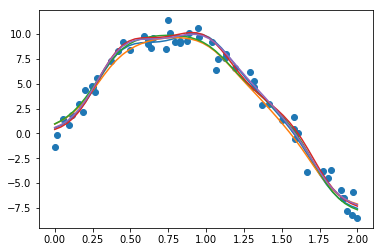

In [7]:
plt.scatter(x_80,t_80)
plt.plot(x1,np.dot(a4[0],fi))
plt.plot(x1,np.dot(a4[1],fi))
plt.plot(x1,np.dot(a4[2],fi))
plt.plot(x1,np.dot(a4[3],fi))
plt.plot(x1,np.dot(a4[4],fi))
plt.show()

In [9]:
mn_4 = np.dot(mn_80,fi_4)
sigma_t4 = 1+np.dot(np.dot(fi_4.transpose(),sn_80),fi_4)
w4 = np.dot(np.dot(inv(np.dot(fi_4,fi_4.transpose())),fi_4),mn_4)

In [10]:
#standard deviation
m4 = np.sqrt(np.diag(sigma_t4))

In [11]:
#upper and lower bound
up4 = mn_4+m4
d4 = mn_4-m4

In [12]:
w4_up = np.dot(np.dot(inv(np.dot(fi_4,fi_4.transpose())),fi_4),(up4))
w4_d = np.dot(np.dot(inv(np.dot(fi_4,fi_4.transpose())),fi_4),(d4))

In [13]:
# for x-label
x1 = np.array(np.linspace(0,2,50))
fi1 = []
fi = []
for j in range(7):
    for i in range(50):
        fi_0 = sigmoid((x1[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []

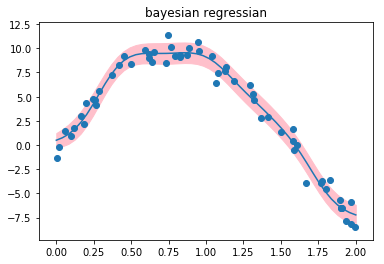

In [15]:
plt.fill_between(x1,np.dot(w4_up,fi),np.dot(w4_d,fi),color='pink')
plt.scatter(x_80,t_80)
plt.plot(x1,np.dot(w4,fi))
plt.title('bayesian regressian')
plt.show()